# Optimized Hyperparameters

| hyperparameter|ESOL|FP|AIT|FLVL|FLVU|HCOM|
|--------------:|---:|-:|--:|---:|---:|---:|
| hidden_size | 91 | 84 | 65 | 63 | 68 | 64 |
| dropout | 0.282 | 0.360 | 0.266 | 0.362 | 0.335 | 0.435 |
| num_layers | 2 | 4 | 4 | 3 | 2 | 4 |
| num_timesteps | 4 | 4 | 4 | 3 | 3 | 4 |
| lr_init | 0.01 | 0.01 | 0.01 | 0.01 | 0.001 | 0.01 |
| gamma | 0.980 | 0.994 | 0.995 | 0.982 | 0.995 | 0.995 |
| weight_decay | 6.0 $\times$ 10$^{-5}$ | 3.5 $\times$ 10$^{-3}$ | 1.8 $\times$ 10$^{-3}$ | 1.3 $\times$ 10$^{-2}$ | 1.2 $\times$ 10$^{-3}$ | 2.7 $\times$ 10$^{-3}$ |

# Hyperparameters

In [1]:
parameters = dict(
    subfrag_size = 12,
    edge_size = 3,
    out_size = 1,
    seed = 42,
    batch_size = 256,
    max_epoch = 200,
    verbose = True,
    save = True,
    
    target = 'FP',
    hidden_size = 84,
    dropout = 0.360,
    num_layers = 4,
    num_timesteps = 4,
    lr_init = 0.01,
    gamma = 0.994,
    weight_decay = 3.5E-3,
)
DATAPATH = "/SSD2/bgkang/Chemomile"

# Dataset

In [ ]:
import sys
sys.path.append(DATAPATH)
from src.data import Dataset

dataset = Dataset(
    target = parameters['target'],
    seed = parameters['seed'],
    batch_size = parameters['batch_size'],
    verbose = parameters['verbose'],
    root = DATAPATH
)

# Model

In [ ]:
from src.model import Chemomile

model = Chemomile(
    subfrag_size = parameters['subfrag_size'],
    hidden_size = parameters['hidden_size'],
    out_size = parameters['out_size'],
    edge_size = parameters['edge_size'],
    dropout = parameters['dropout'],
    num_layers = parameters['num_layers'],
    num_timesteps = parameters['num_timesteps'],
)

# Training

In [ ]:
from src.train import Training

train = Training(model, parameters, dataset = dataset, root = DATAPATH + "/Model")
train.run()

# Loss Curve

# Test

# Better Plot

## Model Loding

In [3]:
import sys
import torch
DATAPATH = "/SSD2/bgkang/Chemomile"
sys.path.append(DATAPATH)
from src.model import Chemomile
from src.data import Dataset
from src.train import Training

MODELPATH = "../Model/FP-2024-06-12-06-14-47"
# MODELPATH = "../Model/AIT-2024-06-12-06-39-26"
# MODELPATH = "../Model/HCOM-2024-06-12-07-04-08"
# MODELPATH = "../Model/FLVL-2024-06-12-06-43-19"
# MODELPATH = "../Model/FLVU-2024-06-12-06-59-13"

trained = Chemomile(
            subfrag_size = parameters['subfrag_size'],
            hidden_size = parameters['hidden_size'],
            out_size = parameters['out_size'],
            edge_size = parameters['edge_size'],
            dropout = parameters['dropout'],
            num_layers = parameters['num_layers'],
            num_timesteps = parameters['num_timesteps'],
            )

trained.load_state_dict(torch.load(MODELPATH))

dataset = Dataset(target = parameters['target'], root = DATAPATH, batch_size = 32)

testing = Training(trained, parameters, dataset)

	DataDump found for 'FP'. Loading dumped data.
Training : 754 | Validation : 94 | Test : 95
Total : 943


## Total Set

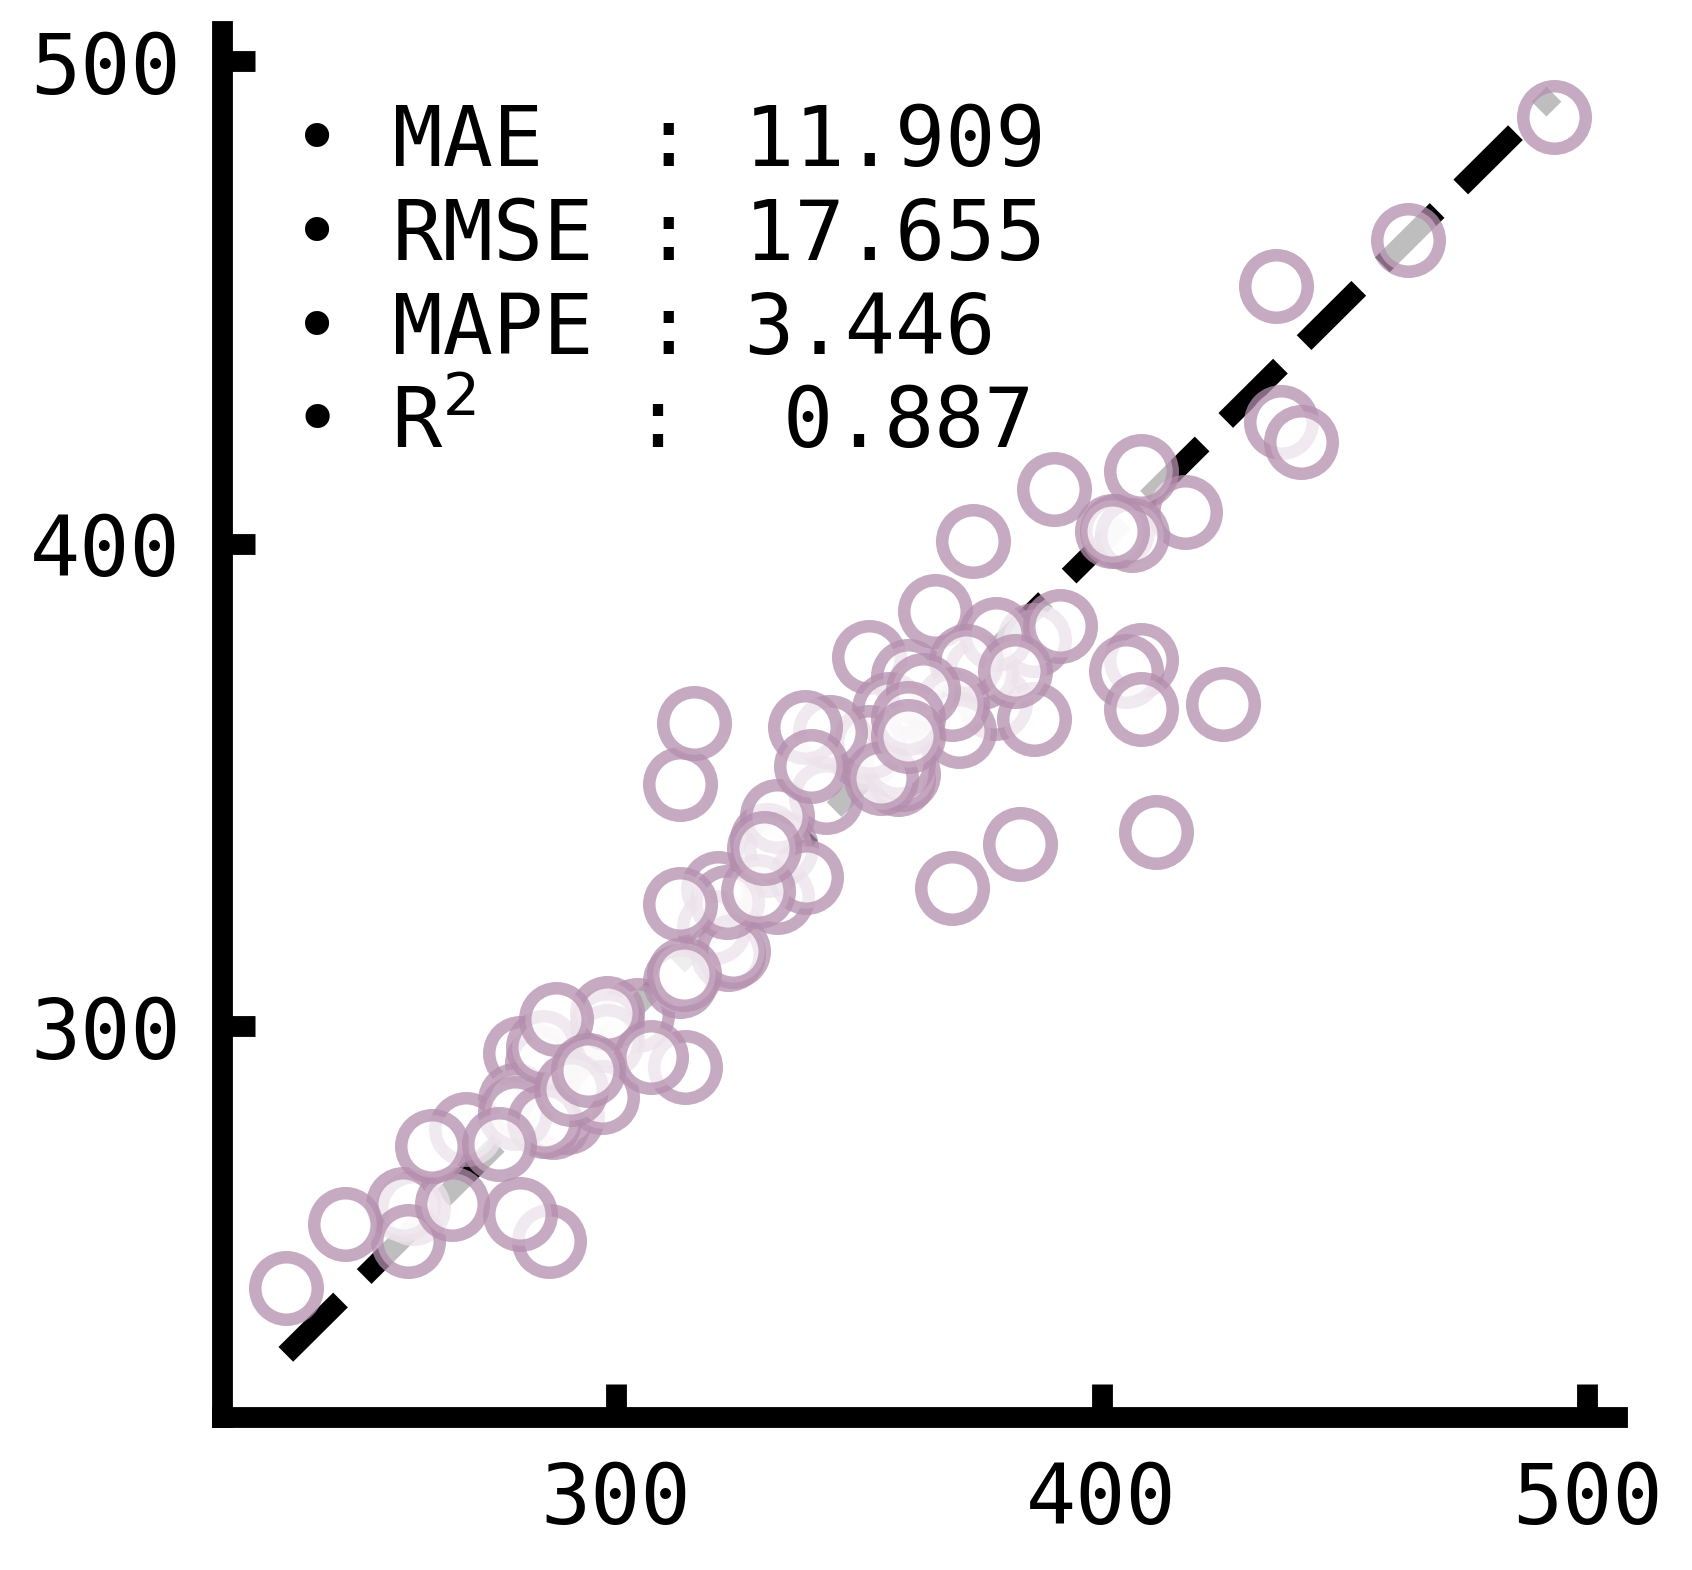

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

##########################
AXISWIDTH = 5
MARKERSIZE = 15
FONTSIZE_LABEL = 30
FONTSIZE_TICK = 20
TICK_PAD = 10
TICK_LENGTH = 8
MARKEREDGE = 3
COLOR = "#B48EAD"
ALPHA = 0.75
##########################

true, pred = testing.eval()
testing.metrics(true, pred)

fig = plt.figure(figsize = (6,6), dpi = 300)
ax = plt.gca()

if parameters['target'] == "HCOM":
    true = true * 1.0E-9
    pred = pred * 1.0E-9
    testing.metrics(true, pred)

ax.plot([true.min(), true.max()], [true.min(), true.max()],
        color = 'k', linestyle = '--', linewidth = AXISWIDTH)
ax.plot(true, pred, marker = 'o', alpha = ALPHA, linestyle = 'None',
        color = "#FFFFFF", markeredgecolor = COLOR, markeredgewidth = MARKEREDGE, markersize = MARKERSIZE)

annot = f"• MAE  : {testing.mae:>6.3f}\n• RMSE : {testing.rmse:>6.3f}\n• MAPE : {testing.mdape:>4.3f}\n• R$^2$   : {testing.r2:>6.3f}"
ax.annotate(annot, xy = (0.05, 0.7), xycoords = 'axes fraction', fontsize = FONTSIZE_TICK)

ax.spines['left'].set_linewidth(AXISWIDTH)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(AXISWIDTH)

# ax.set_title(f"{parameters['target']}", fontsize = FONTSIZE_LABEL)
# ax.set_xlabel("True", fontsize = FONTSIZE_LABEL)
# ax.set_ylabel("Predicted", fontsize = FONTSIZE_LABEL)
ax.tick_params(labelsize = FONTSIZE_TICK, width = AXISWIDTH, length = TICK_LENGTH, direction = 'in', pad = TICK_PAD)

ax.set_yticks(ticks = ax.get_xticks())
ax.set_ylim(*ax.get_xlim())

plt.savefig(f"{parameters['target']}_total.png", dpi = 300)
plt.show()

# Top-10

In [8]:
dataset.total_set.sort(key = lambda x : x.y, reverse = True)
[print(data.smiles) for data in dataset.total_set[:10]]

c1(C(=O)O)ccc(C(=O)O)cc1
OCC(C(O))(C(O))CO
c1(C(=O)O)c(OC(=O)C)cccc1
C1N2CN3CN1CN(C3)C2
c1c(C(=O)O)cc2C(=O)OC(=O)c2c1
c1(Cl)c(Cl)c(Cl)c(Cl)c(Cl)c1(Cl)
CCCCC(CC)COC(=O)c1ccc(C(=O)OCC(CC)CCCC)cc1
c1(C(=O)OCCCCCCC(C)C)c(C(=O)OCCCCCCC(C)C)cccc1
C1(C(=O)O)CCC(C(=O)O)CC1
O=C(c1ccccc1)OCCOCCOC(=O)c1ccccc1


[None, None, None, None, None, None, None, None, None, None]